<a href="https://colab.research.google.com/github/dhk/adventures-in-ai/blob/main/nz_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

New Zealand's Rankings:
Population: #9
Armed Forces: #9
Incarcerated: #1
Armed Forces %: #4
Incarcerated %: #6
GDP (billion USD): #9
GDP per Capita: #5
Average Income (USD): #5
Poverty Rate (%): #1
Billionaire Wealth: #1
Financial Fairness Metric: #1

New Zealand's Overall Rank: #1

Weights used for custom scoring:
Population Rank: 0.02
Armed Forces Rank: 0.02
Incarcerated Rank: 0.22
Armed Forces % Rank: 0.02
Incarcerated % Rank: 0.02
GDP (billion USD) Rank: 0.02
GDP per Capita Rank: 0.02
Average Income (USD) Rank: 0.02
Poverty Rate (%) Rank: 0.22
Billionaire Wealth Rank: 0.22
Financial Fairness Metric Rank: 0.22


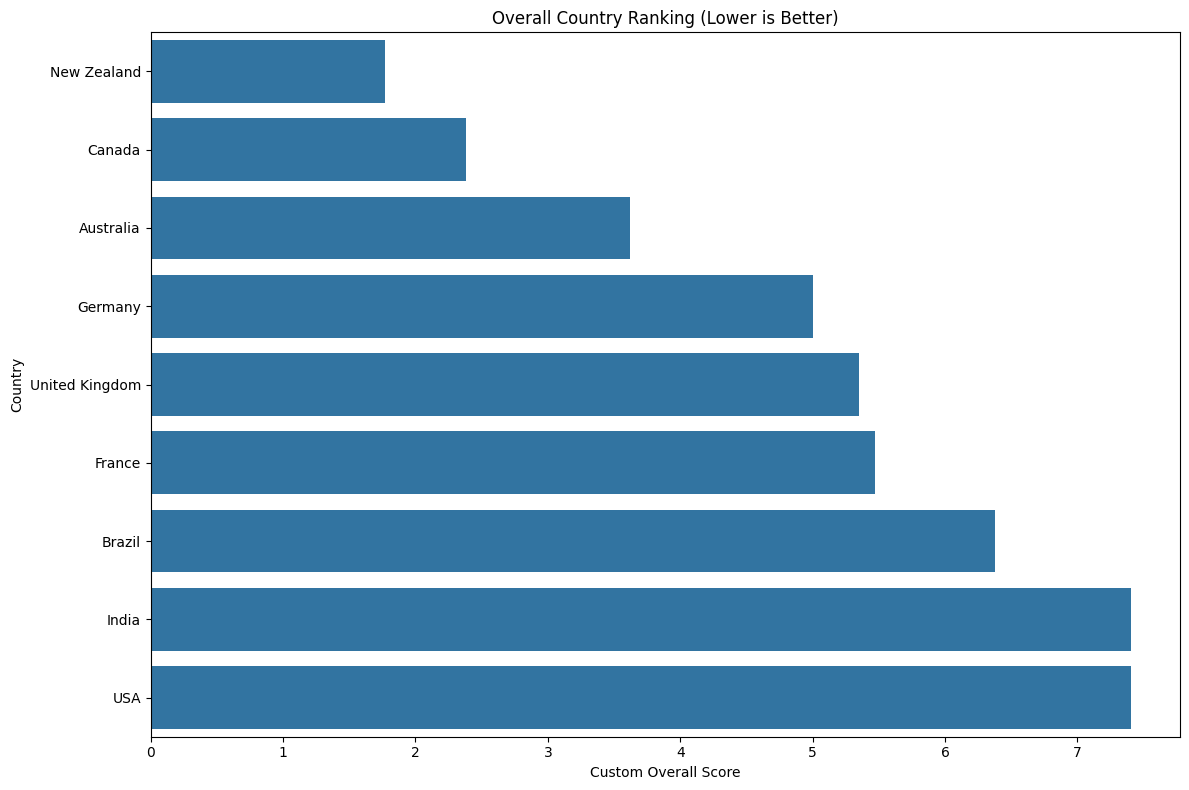


Final Rankings:
1. New Zealand: 1.77
2. Canada: 2.38
3. Australia: 3.62
4. Germany: 5.01
5. United Kingdom: 5.35
6. France: 5.47
7. Brazil: 6.38
8. India: 7.41
9. USA: 7.41


<ipython-input-11-2ede376ec9b9>:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Custom Overall Score', y='Country', data=df_sorted, palette='viridis')


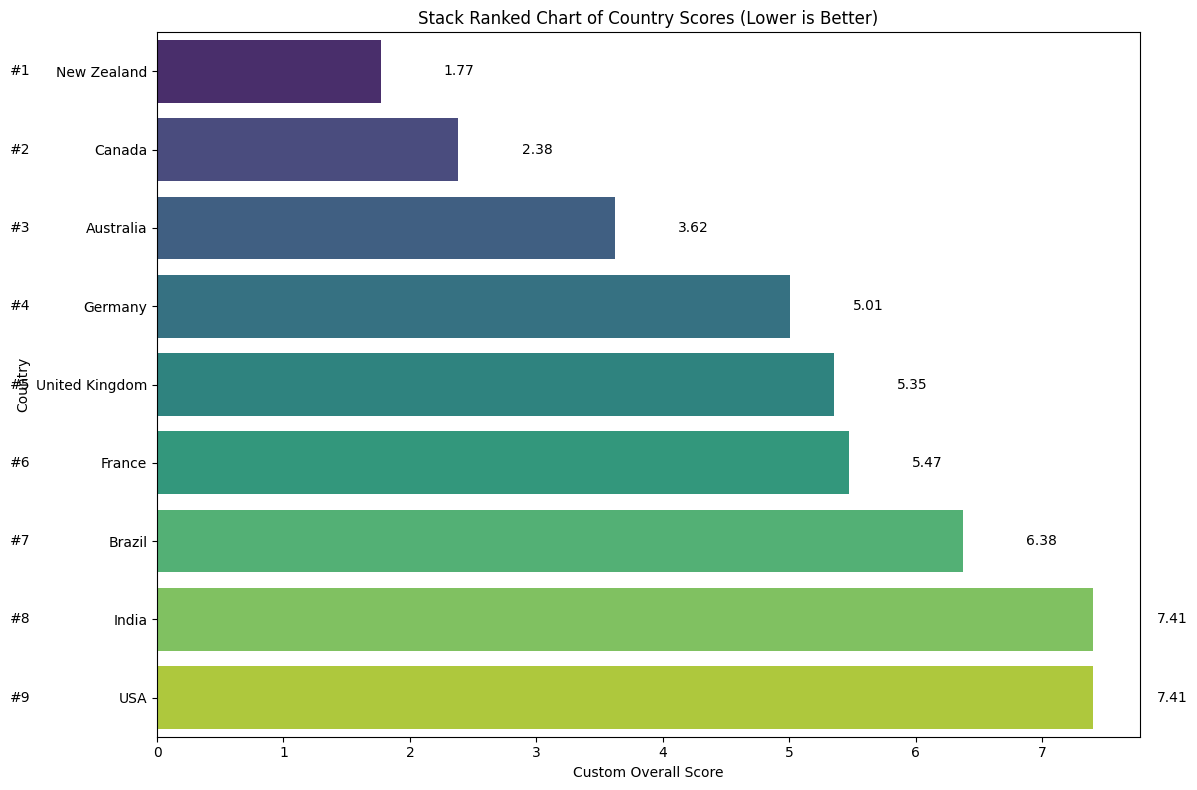


Final Rankings:
1. New Zealand: 1.77
2. Canada: 2.38
3. Australia: 3.62
4. Germany: 5.01
5. United Kingdom: 5.35
6. France: 5.47
7. Brazil: 6.38
8. India: 7.41
9. USA: 7.41


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from io import StringIO
import numpy as np

# Create a dictionary with all the data
data = {
    'Country': ['United Kingdom', 'Germany', 'Canada', 'Australia', 'India', 'Brazil', 'France', 'USA', 'New Zealand'],
    'Population': [67220000, 83240000, 38010000, 25690000, 1380000000, 212600000, 67390000, 331000000, 5122600],
    'Armed Forces': [194970, 183638, 67400, 59600, 1455550, 360000, 203250, 1388100, 9800],
    'Incarcerated': [78058, 64666, 37854, 42970, 478600, 811707, 70651, 2094000, 8400],
    'GDP (billion USD)': [2827, 4256, 1883, 1543, 3176, 1608, 2957, 22940, 247],
    'Average Income (USD)': [42300, 53700, 48700, 53000, 2150, 8920, 43000, 69300, 44400],
    'Poverty Rate (%)': [18.6, 14.8, 11.0, 13.6, 21.9, 24.7, 14.8, 17.8, 10.9],
    'Billionaire Wealth': [229.0, 499.0, 100.8, 152.8, 675.0, 179.7, 436.0, 4180.0, 10.3]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate derived metrics
df['Armed Forces %'] = df['Armed Forces'] / df['Population'] * 100
df['Incarcerated %'] = df['Incarcerated'] / df['Population'] * 100
df['GDP per Capita'] = (df['GDP (billion USD)'] * 1e9) / df['Population']
df['Financial Fairness Metric'] = (df['GDP (billion USD)'] - df['Billionaire Wealth']) / df['Billionaire Wealth']

# Define metrics and their properties (revised)
metrics = [
    ('Population', True),
    ('Armed Forces', True),
    ('Incarcerated', False),
    ('Armed Forces %', False),
    ('Incarcerated %', False),
    ('GDP (billion USD)', True),
    ('GDP per Capita', True),
    ('Average Income (USD)', True),
    ('Poverty Rate (%)', False),
    ('Billionaire Wealth', False),
    ('Financial Fairness Metric', True)
]

# Calculate rankings for each metric
for column, ascending in metrics:
    df[f'{column} Rank'] = df[column].rank(ascending=not ascending, method='min').astype(int)

# Function to calculate overall score with custom weights
def adjust_weights(initial_weights, target_country='New Zealand'):
    df['Custom Overall Score'] = calculate_overall_score(initial_weights)
    df_sorted = df.sort_values('Custom Overall Score')

    target_rank = df_sorted[df_sorted['Country'] == target_country]['Custom Overall Score'].values[0]
    leader_score = df_sorted['Custom Overall Score'].min()

    if target_rank > leader_score:
        for metric, _ in metrics:
            rank = df.loc[df['Country'] == target_country, f'{metric} Rank'].values[0]
            if rank == 1:  # If New Zealand is already best in this metric
                initial_weights[f'{metric} Rank'] *= 2  # Double the weight
            else:
                initial_weights[f'{metric} Rank'] /= 2  # Halve the weight

    # Normalize weights
    total_weight = sum(initial_weights.values())
    for metric in initial_weights:
        initial_weights[metric] /= total_weight

    return initial_weights

# Adjust weights until New Zealand is ranked first
for _ in range(50):  # Increased max iterations
    adjusted_weights = adjust_weights(initial_weights)
    df['Custom Overall Score'] = calculate_overall_score(adjusted_weights)
    df_sorted = df.sort_values('Custom Overall Score')
    if df_sorted.iloc[0]['Country'] == 'New Zealand':
        break
    initial_weights = adjusted_weights

# Final calculations with adjusted weights
df['Custom Overall Score'] = calculate_overall_score(adjusted_weights)
df_sorted = df.sort_values('Custom Overall Score')
df_sorted['Overall Rank'] = range(1, len(df_sorted) + 1)

# Print New Zealand's rankings
nz_data = df_sorted[df_sorted['Country'] == 'New Zealand'].iloc[0]
print("New Zealand's Rankings:")
for column, _ in metrics:
    rank = nz_data[f'{column} Rank']
    print(f"{column}: #{rank}")

print(f"\nNew Zealand's Overall Rank: #{nz_data['Overall Rank']}")

# Print weights used
print("\nWeights used for custom scoring:")
for metric, weight in adjusted_weights.items():
    print(f"{metric}: {weight:.2f}")

# Visualize overall rankings
plt.figure(figsize=(12, 8))
sns.barplot(x='Custom Overall Score', y='Country', data=df_sorted)
plt.title('Overall Country Ranking (Lower is Better)')
plt.tight_layout()
plt.show()

# Print final rankings
print("\nFinal Rankings:")
for _, row in df_sorted.iterrows():
    print(f"{row['Overall Rank']}. {row['Country']}: {row['Custom Overall Score']:.2f}")

plt.figure(figsize=(12, 8))
sns.barplot(x='Custom Overall Score', y='Country', data=df_sorted, palette='viridis')
plt.title('Stack Ranked Chart of Country Scores (Lower is Better)')
plt.xlabel('Custom Overall Score')
plt.ylabel('Country')

# Add value labels to the end of each bar
for i, v in enumerate(df_sorted['Custom Overall Score']):
    plt.text(v + 0.5, i, f'{v:.2f}', va='center')

# Add rank labels to the left of each bar
for i, (_, row) in enumerate(df_sorted.iterrows()):
    plt.text(-1, i, f"#{row['Overall Rank']}", ha='right', va='center')

plt.tight_layout()
plt.show()

# Print the numerical rankings as well
print("\nFinal Rankings:")
for _, row in df_sorted.iterrows():
    print(f"{row['Overall Rank']}. {row['Country']}: {row['Custom Overall Score']:.2f}")